In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # 导入 scipy 中的统计模块
from statannotations.Annotator import Annotator

# 1. 加载数据
baseline_data = pd.read_csv('../time_analysis/baseline.csv')
experiment_data = pd.read_csv('../time_analysis/experiment.csv')


In [2]:
def perform_t_test(data1, data2):
    # 执行 T-检验
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    return t_statistic, p_value

def add_brace_and_p_value(ax, x1, x2, y, p_value):
    ax.annotate("", xy=(x1, y), xytext=(x2, y), 
                arrowprops=dict(arrowstyle="-[,widthB=1.5,lengthB=0.2", lw=2, color='black'))
    ax.text((x1 + x2) / 2, y + 0.05, f'P = {p_value:.4f}', ha='center', va='bottom', fontsize=12)


In [ ]:
def plot_box_for_column(column_name, x_label, y_label, legend_labels):
    # 1. 加载数据
    baseline_data = pd.read_csv('../time_analysis/baseline.csv')
    experiment_data = pd.read_csv('../time_analysis/experiment.csv')

    # 2. 创建新的DataFrame来简化绘图过程
    combined_data = pd.concat([baseline_data[column_name], experiment_data[column_name]], axis=0)
    label_data = ['Baseline'] * len(baseline_data) + ['FARPLS'] * len(experiment_data)
    df = pd.DataFrame({x_label: label_data, y_label: combined_data})

   # 3. 使用Seaborn绘制箱线图，并设置所需的调色板
    plt.figure(figsize=(5, 10))
    # {"Baseline": "#5C98D4", "FARPLS": "#F89A2A"} FF7F00
    sns.boxplot(x=x_label, y=y_label, data=df, palette={"Baseline": "#3FAA59", "FARPLS": "#FF7F00"} )
    plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(1, -0.2), ncol=len(legend_labels))
    
    #4 T-test
    t_statistic, p_value = perform_t_test(baseline_data[column_name], experiment_data[column_name])
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    # 添加横向方括号和 p 值
    # 6. 使用 statannotations 库来标注显著性
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim())
    # add_brace_and_p_value(ax, 0, 1, 1.15, p_value)
    pairs = [("Baseline", "FARPLS")]
    
    annotator = Annotator(ax, pairs, data=df, x=x_label, y=y_label)
    # annotator.configure(test='Mann-Whitney', text_format="simple", loc='inside')
    annotator.set_custom_annotations(["first pair"]) , #"second pair", "third pair"
    annotator.apply_and_annotate()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # 5. 保存图形到指定文件
    plt.savefig(f"./fig/boxplot/{column_name}.pdf")
    plt.savefig(f"./fig/boxplot/{column_name}.png")
     # 4. 显示图形
    plt.show()
    plt.close()

METRIC_COLUMNS = [
    "Total Time",
    "Average Time Per Pair",
    "Consistency",
]

for column_name in METRIC_COLUMNS:
    plot_box_for_column(column_name, column_name, "Value", ["Baseline", "FARPLS"])





p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Thur vs. Fri: first pair
Thur vs. Sat: second pair
Sun vs. Fri: third pair


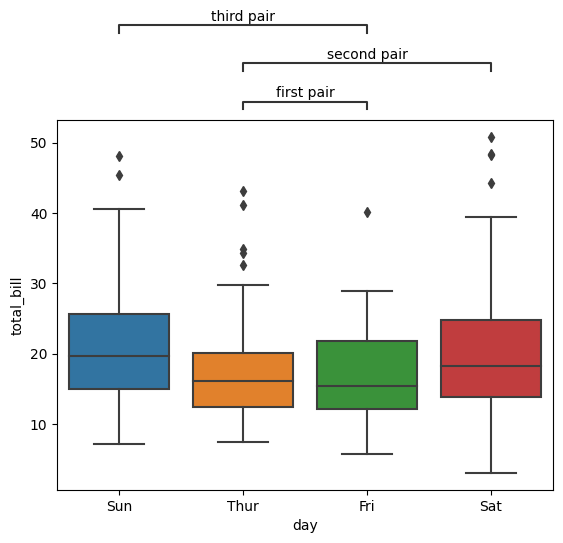

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)

annotator = Annotator(ax, pairs=[("Thur", "Fri"),("Thur", "Sat"), ("Fri", "Sun")],
               data=df, x=x, y=y, order=order)
annotator.configure(loc='outside')
annotator.set_custom_annotations(["first pair", "second pair", "third pair"])
annotator.annotate()

plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Baseline vs. FARPLS: t-test p = < 0.051.74e-03significantly<


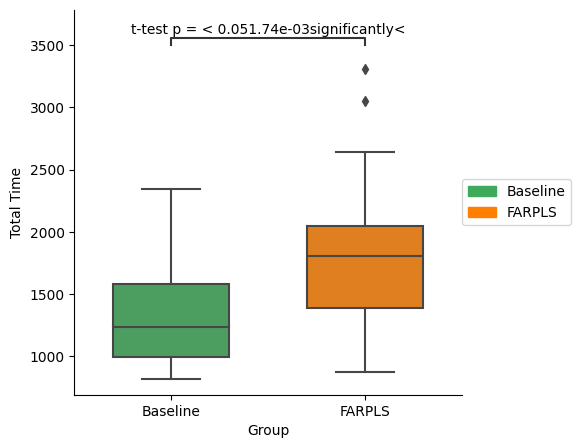

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


baseline_data = pd.read_csv('../time_analysis/baseline.csv')
experiment_data = pd.read_csv('../time_analysis/experiment.csv')

# 提取 Total Time 列
baseline_total_time = baseline_data['Total Time']
experiment_total_time = experiment_data['Total Time']

# 创建新的DataFrame以绘制箱线图
data = pd.DataFrame({'Group': ['Baseline'] * len(baseline_total_time) + ['FARPLS'] * len(experiment_total_time),
                     'Total Time': pd.concat([baseline_total_time, experiment_total_time])})

# 在箱线图上添加自定义图例
baseline_patch = plt.Rectangle((0, 0), 1, 1, color="#3FAA59", label='Baseline')
farpls_patch = plt.Rectangle((0, 0), 1, 1, color="#FF7F00", label='FARPLS')

# 使用Seaborn绘制箱线图
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=data, x='Group', y='Total Time', palette={"Baseline": "#3FAA59", "FARPLS": "#FF7F00"},width=0.6)
x = "group"
y = "Total Time"
order = ["Baseline", "FARPLS"]

# 使用 statannotations 库来标注显著性
annotator = Annotator(ax, pairs=[("Baseline", "FARPLS")], data=data, x='Group', y='Total Time', order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
p_value = 0.00173691885101174
scientific_notation = "{:.2e}".format(p_value)
test = "t-test"
if p_value < 0.05 :
    p_realm ="< 0.05" 
    significance = "significantly"
if p_value > 0.05:
    p_realm = "> 0.05"
    significance = "no significant differences"
alternative = "<"
annotationWord = test + " p = " +p_realm+str(scientific_notation)+significance+alternative
annotator.set_custom_annotations([annotationWord])

annotator.annotate()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(handles=[baseline_patch, farpls_patch], loc='center right', bbox_to_anchor=(1.3, 0.5))

# 6. 保存图形为PDF文件
plt.savefig('Total_Time.pdf', format='pdf', dpi=300, bbox_inches='tight')
# 5. 显示图形
plt.show()




p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Baseline vs. FARPLS:  M.W.U. p = 4.63e-03  p < 0.05 alternative <


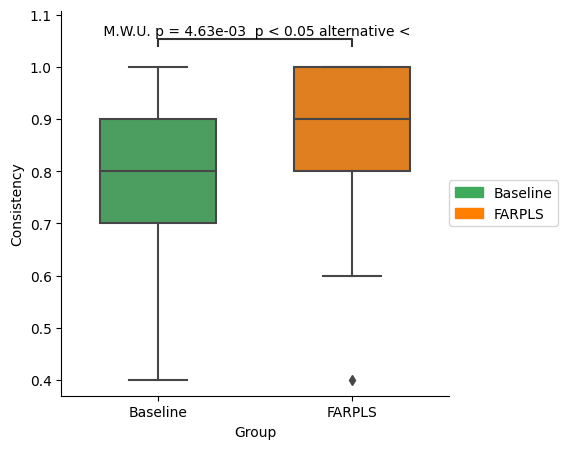

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# 1. 加载数据
baseline_data = pd.read_csv("D:/1/holiday/paperddl/trajectory-preference-collection-tool-server/trajectory-preference-collection-tool-server/server/data_analysis/questionnaire/baseline.csv")
experiment_data = pd.read_csv("D:/1/holiday/paperddl/trajectory-preference-collection-tool-server/trajectory-preference-collection-tool-server/server/data_analysis/questionnaire/experiment.csv")

# 2. 提取 Total Time 列
baseline_total_time = baseline_data['Consistency']
experiment_total_time = experiment_data['Consistency']

# 3. 创建新的DataFrame以绘制箱线图
data = pd.DataFrame({'Group': ['Baseline'] * len(baseline_total_time) + ['FARPLS'] * len(experiment_total_time),
                     'Consistency': pd.concat([baseline_total_time, experiment_total_time])})

# 4. 使用Seaborn绘制箱线图
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=data, x='Group', y='Consistency', palette={"Baseline": "#3FAA59", "FARPLS": "#FF7F00"},width=0.6)
x = "group"
y = "Consistency"
order = ["Baseline", "FARPLS"]
# 5. 使用 statannotations 库来标注显著性
annotator = Annotator(ax, pairs=[("Baseline", "FARPLS")], data=data, x='Group', y='Consistency', order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
number = 0.00463494717682611
scientific_notation = "{:.2e}".format(number)
annotationWord = " M.W.U. p = " +str(scientific_notation)+"  p < 0.05 alternative <"
annotator.set_custom_annotations([annotationWord])
annotator.annotate()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# 在箱线图上添加自定义图例
baseline_patch = plt.Rectangle((0, 0), 1, 1, color="#3FAA59", label='Baseline')
farpls_patch = plt.Rectangle((0, 0), 1, 1, color="#FF7F00", label='FARPLS')




plt.legend(handles=[baseline_patch, farpls_patch], loc='center right', bbox_to_anchor=(1.3, 0.5))


# 6. 保存图形为PDF文件
plt.savefig('Consistency.pdf', format='pdf', dpi=300, bbox_inches='tight')
# 5. 显示图形
plt.show()

